
####  **What are Moving Window Functions?**

They're operations that calculate statistics (like mean, sum, etc.) over a **sliding segment** of your data—**one small chunk at a time**—and move across the dataset step-by-step.

#### **What does “moving window” mean?**

Imagine you have time series data (like stock prices every day). A **moving window** takes a small subset of that data (say 3 days at a time), computes something on it (like the average), then **slides forward** by one step and repeats.

✅ Useful for:
- **Smoothing** noisy data  
- **Detecting trends**  
- **Filling gaps** in inconsistent data

---

### 📊 **Types of Moving Window Functions**

1. **Fixed-size window functions**  
   Examples: `rolling().mean()`, `rolling().sum()`
   
   🧮 It calculates statistics over a **fixed number of past observations**.
   ```python
   ts.rolling(window=3).mean()
   ```
   → Average of the current and previous 2 data points.

2. **Exponentially weighted window functions**  
   Examples: `ewm().mean()`
   
   🧲 This doesn't have a "fixed" window size, but instead gives **more weight to recent values**. Older values fade gradually.

   ```python
   ts.ewm(span=5).mean()
   ```
   → Recent data points have more influence than older ones.

---

### 🚫 **What about missing data (NaN)?**

Both `rolling()` and `ewm()` **automatically ignore missing data** (just like pandas’ regular statistical methods).

So if your time series has gaps, you don’t need to worry—they won’t break the function.

### 🧾 Summary

| Type                          | Description                                             |
|-------------------------------|---------------------------------------------------------|
| `rolling()`                   | Fixed-length moving window (like 3-day average)         |
| `ewm()`                       | Exponential decay, more weight to recent data           |
| Handles Missing Data?         | ✅ Yes                                                  |
| Common Use Cases              | Smoothing, trend detection, anomaly detection           |


In [11]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 

<Axes: >

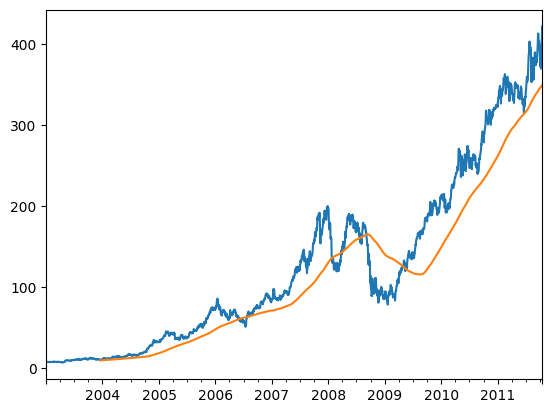

In [12]:
close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates=True,
                           index_col=0)

close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

close_px = close_px.resample("B").ffill()

# now introduce the rolling operator, which behaves similarly to resample and groupby.
# It can be called on a Series or DataFrame along with a window (expressed as a number of periods)

close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

In [14]:
# by default, rolling functions require all of the values in the window to te non-NA.
# this behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series

